In [74]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from scipy.stats import chi2_contingency

In [75]:
file_path = r"C:\Users\JUMIA-4237\Desktop\Thesisoption\arrest_SPQ.csv"

In [76]:
SH = pd.read_csv(file_path)

In [77]:
SH.head(3)

,Type,Date,Part of a policing operation,Latitude,Longitude,Object of search,Outcome,Anything to threaten or harm anyone,Articles for use in criminal damage,Controlled drugs,Evidence of offences under the Act,Firearms,Offensive weapons,Stolen goods
0,Person search,2021-03-31T23:09:00+00:00,False,51.418969,-0.147822,Controlled drugs,Arrest,0,0,1,0,0,0,0
1,Person search,2021-03-31T23:17:00+00:00,False,51.498727,-0.105172,Evidence of offences under the Act,Arrest,0,0,0,1,0,0,0
2,Person and Vehicle search,2021-03-31T23:25:00+00:00,False,51.530467,-0.388379,Controlled drugs,Arrest,0,0,1,0,0,0,0


In [78]:
file_path1 = r"C:\Users\JUMIA-4237\Desktop\Thesisoption\combined_df_crime.csv"

In [79]:
combined_df = pd.read_csv(file_path1)

In [81]:
combined_df.head(3)

,Month,Longitude,Latitude,Location,Anti-social behaviour,Bicycle theft,Burglary,Criminal damage and arson,Drugs,Other crime,Other theft,Possession of weapons,Public order,Robbery,Shoplifting,Theft from the person,Vehicle crime,Violence and sexual offences
0,2021-05,-0.664242,50.791718,On or near Brooks Lane,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,2021-05,-0.664242,50.791718,On or near Brooks Lane,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,2021-05,-1.258193,53.127960,On or near Park Street,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [82]:
combined_df['Month'] = pd.to_datetime(combined_df['Month'], format='%Y-%m')
SH['Date'] = pd.to_datetime(SH['Date'])

crime_categories = ['Anti-social behaviour', 'Bicycle theft', 'Burglary', 'Criminal damage and arson', 'Drugs', 
                    'Other crime', 'Other theft', 'Possession of weapons', 'Public order', 'Robbery', 
                    'Shoplifting', 'Theft from the person', 'Vehicle crime', 'Violence and sexual offences']

arrest_categories = ['Anything to threaten or harm anyone', 'Articles for use in criminal damage', 'Controlled drugs', 
                     'Evidence of offences under the Act', 'Firearms', 'Offensive weapons', 'Stolen goods']

combined_df['Month'] = combined_df['Month'].dt.to_period('M')
crime_monthly = combined_df.groupby('Month')[crime_categories].sum()

SH['Month'] = SH['Date'].dt.to_period('M')
arrest_monthly = SH.groupby('Month')[arrest_categories].sum()

C:\Users\JUMIA-4237\AppData\Local\Temp\ipykernel_22804\339803982.py:17: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  SH['Month'] = SH['Date'].dt.to_period('M')


<Figure size 1400x700 with 0 Axes>

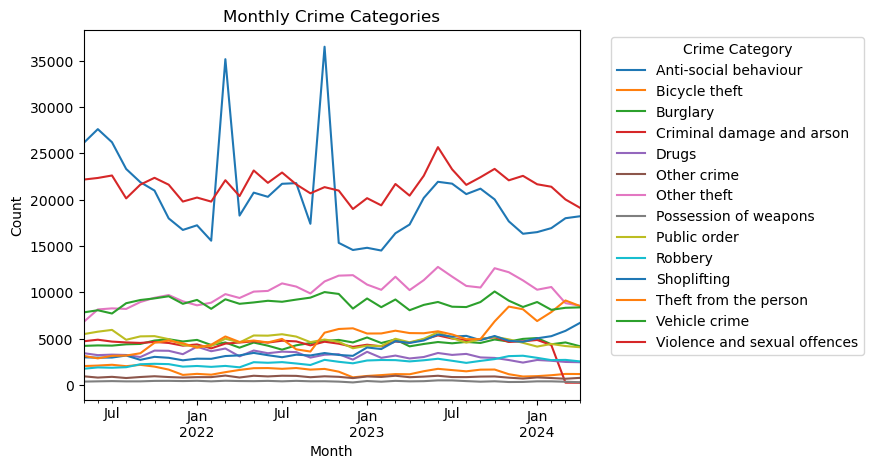

<Figure size 1400x700 with 0 Axes>

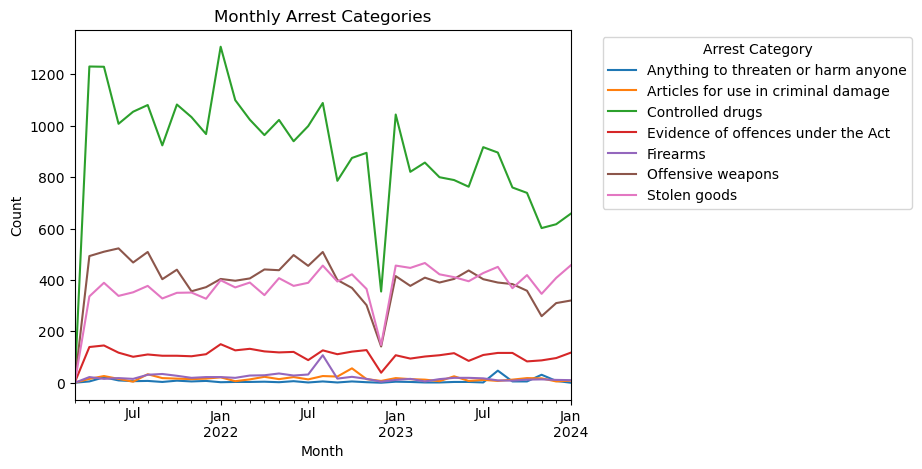

In [83]:
plt.figure(figsize=(14, 7))
ax1 = crime_monthly.plot()
ax1.set_title('Monthly Crime Categories')
ax1.set_xlabel('Month')
ax1.set_ylabel('Count')
ax1.legend(title='Crime Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

plt.figure(figsize=(14, 7))
ax2 = arrest_monthly.plot()
ax2.set_title('Monthly Arrest Categories')
ax2.set_xlabel('Month')
ax2.set_ylabel('Count')
ax2.legend(title='Arrest Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


In [96]:
import numpy as np
from datetime import datetime


combined_df['Month'] = combined_df['Month'].astype(str).str[:7]
combined_df['Month'] = pd.to_datetime(combined_df['Month'], format='%Y-%m')

SH['Date'] = pd.to_datetime(SH['Date'], format='%Y-%m-%dT%H:%M:%S%z')

combined_df.fillna(0, inplace=True)
SH.fillna(0, inplace=True)

category_mapping = {
    'Criminal damage and arson': 'Articles for use in criminal damage',
    'Drugs': 'Controlled drugs',
    'Possession of weapons': 'Offensive weapons',
    'Anything to threaten or harm anyone': 'Offensive weapons',
    'Theft from the person': 'Stolen goods',
    'Robbery': 'Stolen goods',
    'Other theft': 'Stolen goods',
    'Shoplifting': 'Stolen goods',
    'Bicycle theft': 'Stolen goods',
    'Burglary': 'Stolen goods',
    'Violence and sexual offences': 'Evidence of offences under the Act'
}

matched_categories = []
unmatched_crime_categories = []
unmatched_SH_categories = []

for crime_cat in combined_df.columns:
    if crime_cat in category_mapping.keys():
        matched_categories.append((crime_cat, category_mapping[crime_cat]))
    elif crime_cat not in ['Month', 'Longitude', 'Latitude', 'Location']:
        unmatched_crime_categories.append(crime_cat)

for SH_cat in SH.columns:
    if SH_cat in category_mapping.values():
        if SH_cat not in [pair[1] for pair in matched_categories]:
            crime_cat = [key for key, value in category_mapping.items() if value == SH_cat][0]
            matched_categories.append((crime_cat, SH_cat))
    elif SH_cat not in ['Date', 'Type', 'Part of a policing operation', 'Latitude', 'Longitude', 'Object of search', 'Outcome']:
        unmatched_SH_categories.append(SH_cat)

print("Matched Categories:", matched_categories)
print("Unmatched Crime Categories:", unmatched_crime_categories)
print("Unmatched Stop and Search Categories:", unmatched_SH_categories)

Matched Categories: [('Bicycle theft', 'Stolen goods'), ('Burglary', 'Stolen goods'), ('Criminal damage and arson', 'Articles for use in criminal damage'), ('Drugs', 'Controlled drugs'), ('Other theft', 'Stolen goods'), ('Possession of weapons', 'Offensive weapons'), ('Robbery', 'Stolen goods'), ('Shoplifting', 'Stolen goods'), ('Theft from the person', 'Stolen goods'), ('Violence and sexual offences', 'Evidence of offences under the Act')]
Unmatched Crime Categories: ['Anti-social behaviour', 'Other crime', 'Public order', 'Vehicle crime']
Unmatched Stop and Search Categories: ['Anything to threaten or harm anyone', 'Firearms', 'Month']


C:\Users\JUMIA-4237\AppData\Local\Temp\ipykernel_22804\3683387733.py:82: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  SH_series = SH.groupby(SH['Date'].dt.to_period('M'))[SH_cat].sum()


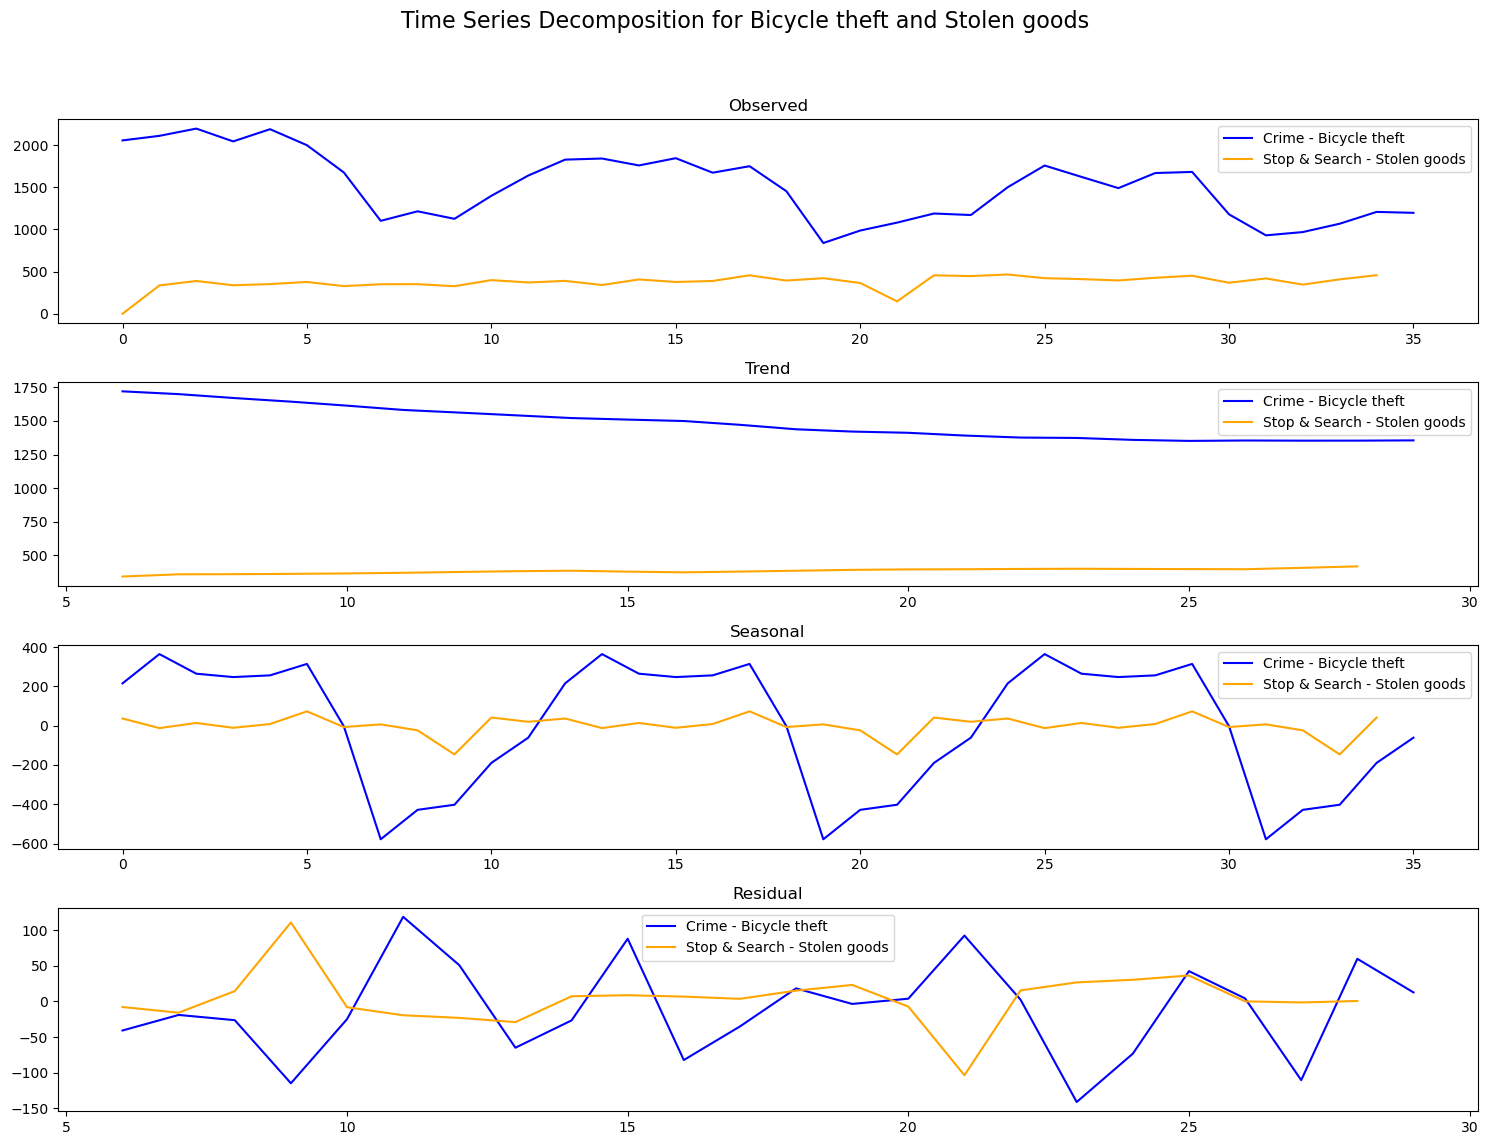

Correlation between Bicycle theft and Stolen goods:
Trend Correlation: -0.95 (negatively correlated, statistically significant, p-value: 0.0000)
Seasonal Correlation: 0.41 (no correlation, not statistically significant, p-value: 0.0535)
Residual Correlation: -0.49 (negatively correlated, statistically significant, p-value: 0.0187)



C:\Users\JUMIA-4237\AppData\Local\Temp\ipykernel_22804\3683387733.py:82: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  SH_series = SH.groupby(SH['Date'].dt.to_period('M'))[SH_cat].sum()


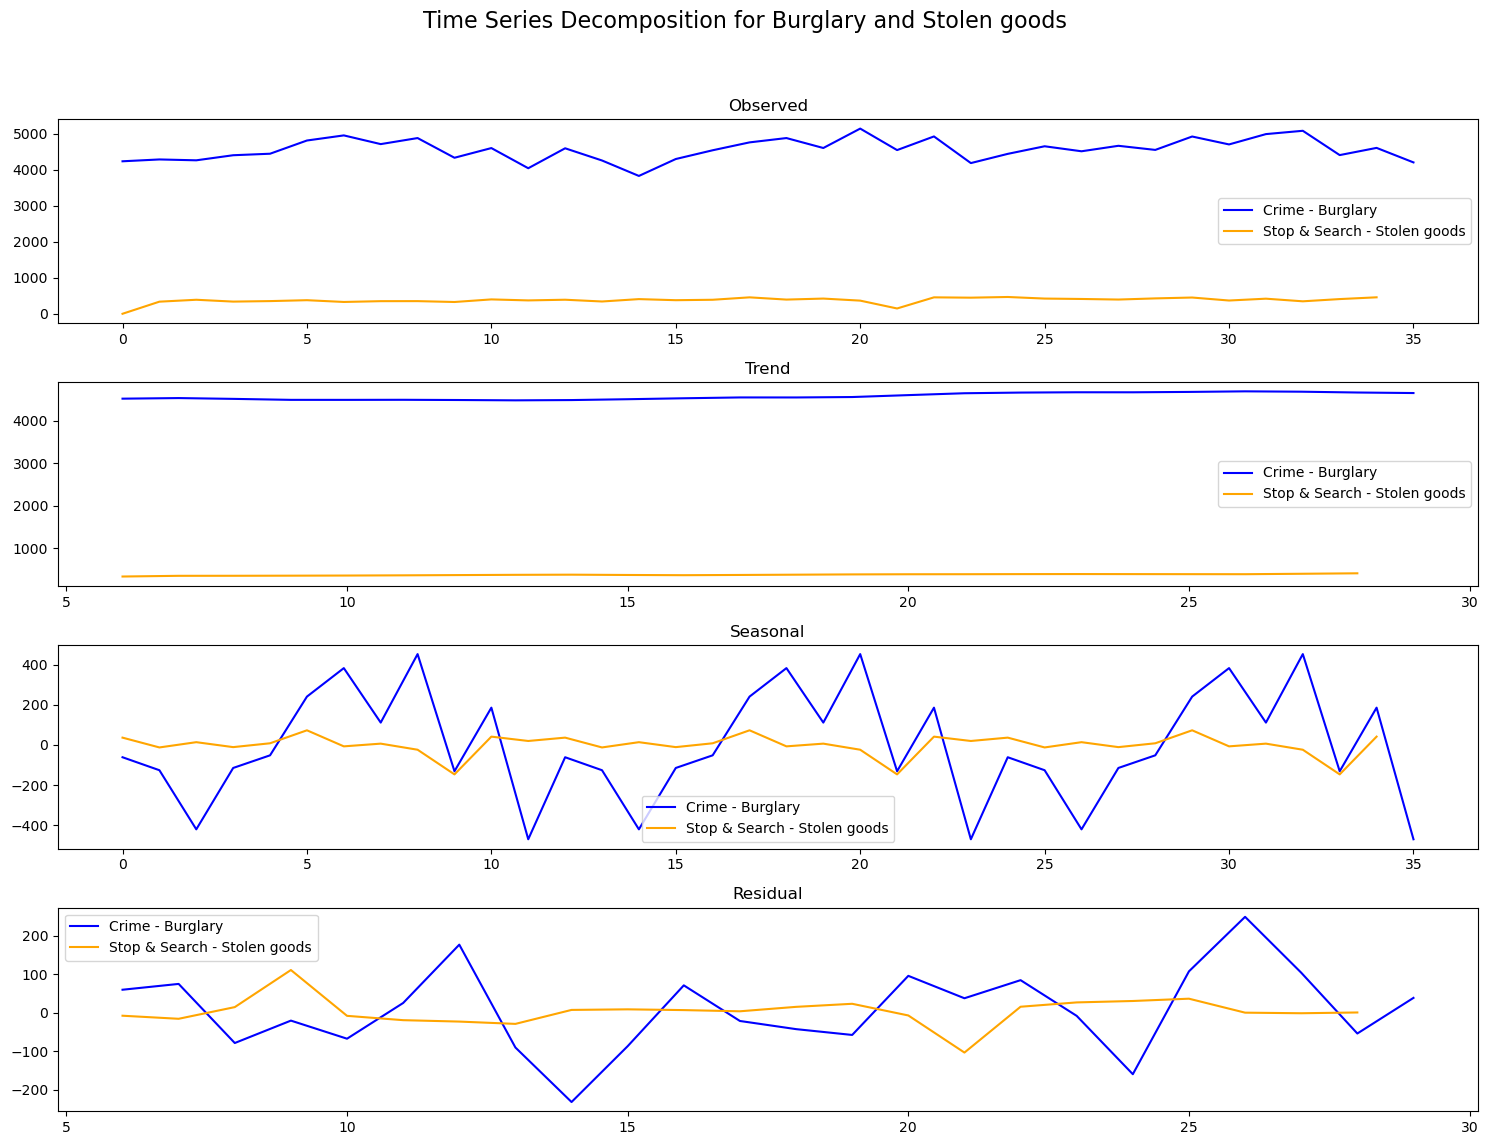

Correlation between Burglary and Stolen goods:
Trend Correlation: 0.78 (positively correlated, statistically significant, p-value: 0.0000)
Seasonal Correlation: 0.05 (no correlation, not statistically significant, p-value: 0.8274)
Residual Correlation: -0.18 (no correlation, not statistically significant, p-value: 0.4136)



C:\Users\JUMIA-4237\AppData\Local\Temp\ipykernel_22804\3683387733.py:82: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  SH_series = SH.groupby(SH['Date'].dt.to_period('M'))[SH_cat].sum()


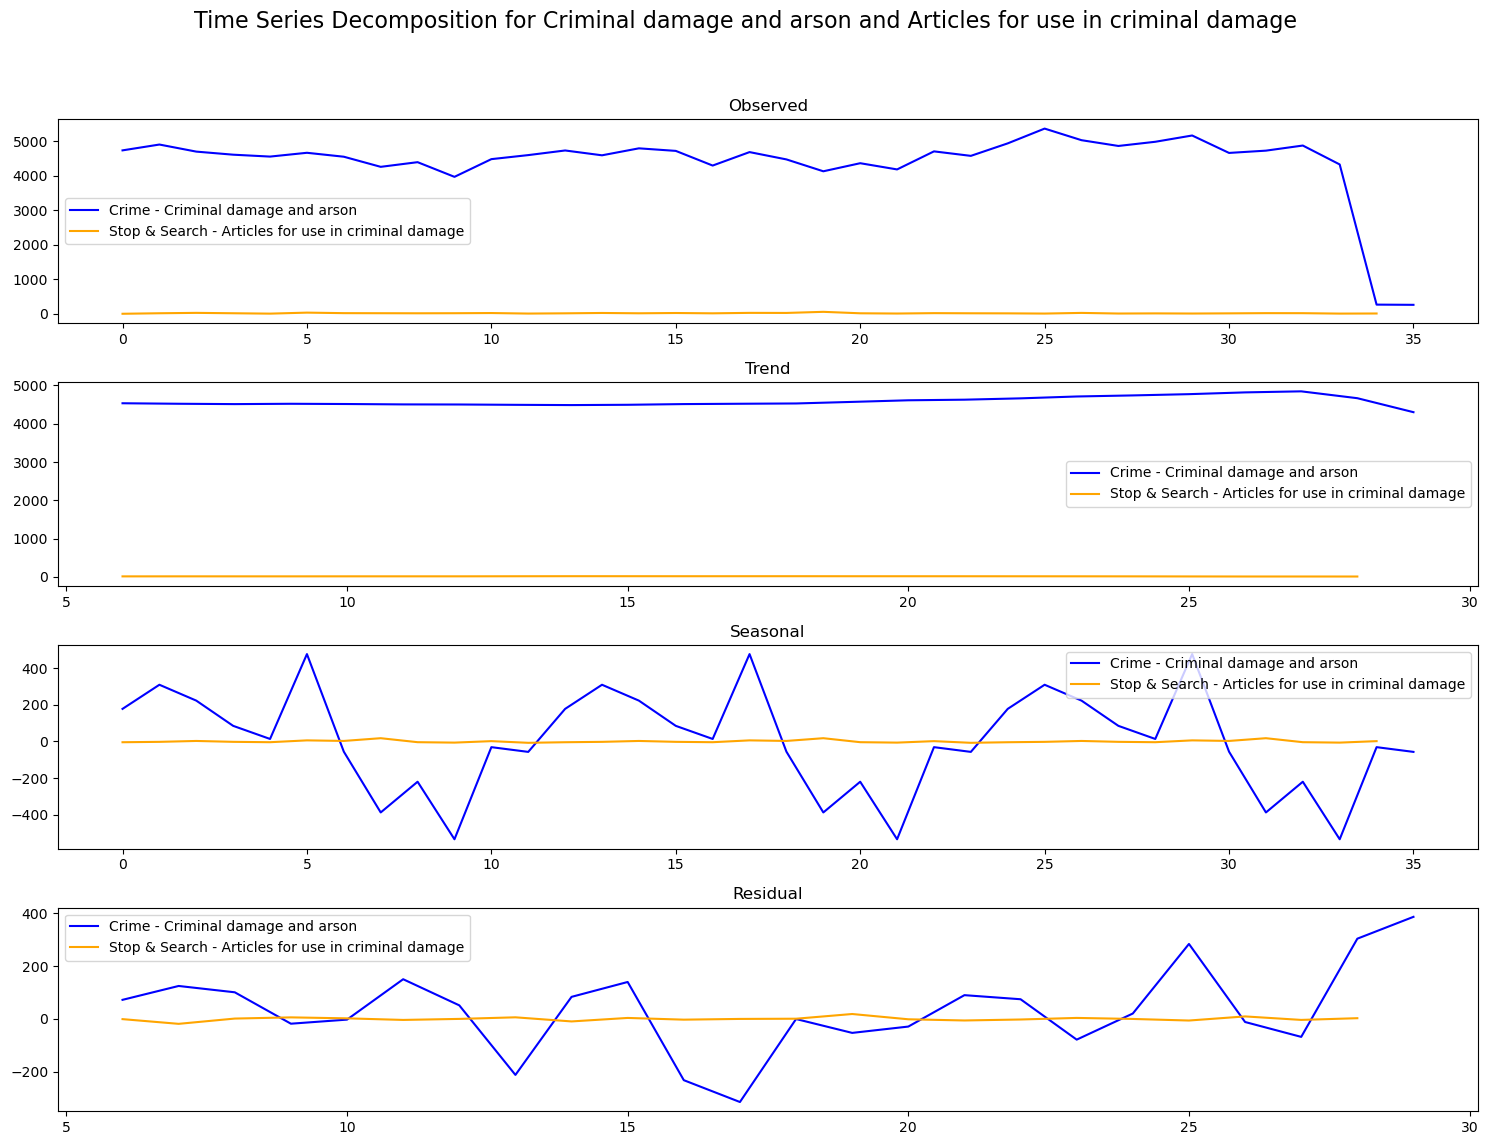

Correlation between Criminal damage and arson and Articles for use in criminal damage:
Trend Correlation: -0.67 (negatively correlated, statistically significant, p-value: 0.0005)
Seasonal Correlation: -0.11 (no correlation, not statistically significant, p-value: 0.6320)
Residual Correlation: -0.29 (no correlation, not statistically significant, p-value: 0.1865)



C:\Users\JUMIA-4237\AppData\Local\Temp\ipykernel_22804\3683387733.py:82: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  SH_series = SH.groupby(SH['Date'].dt.to_period('M'))[SH_cat].sum()


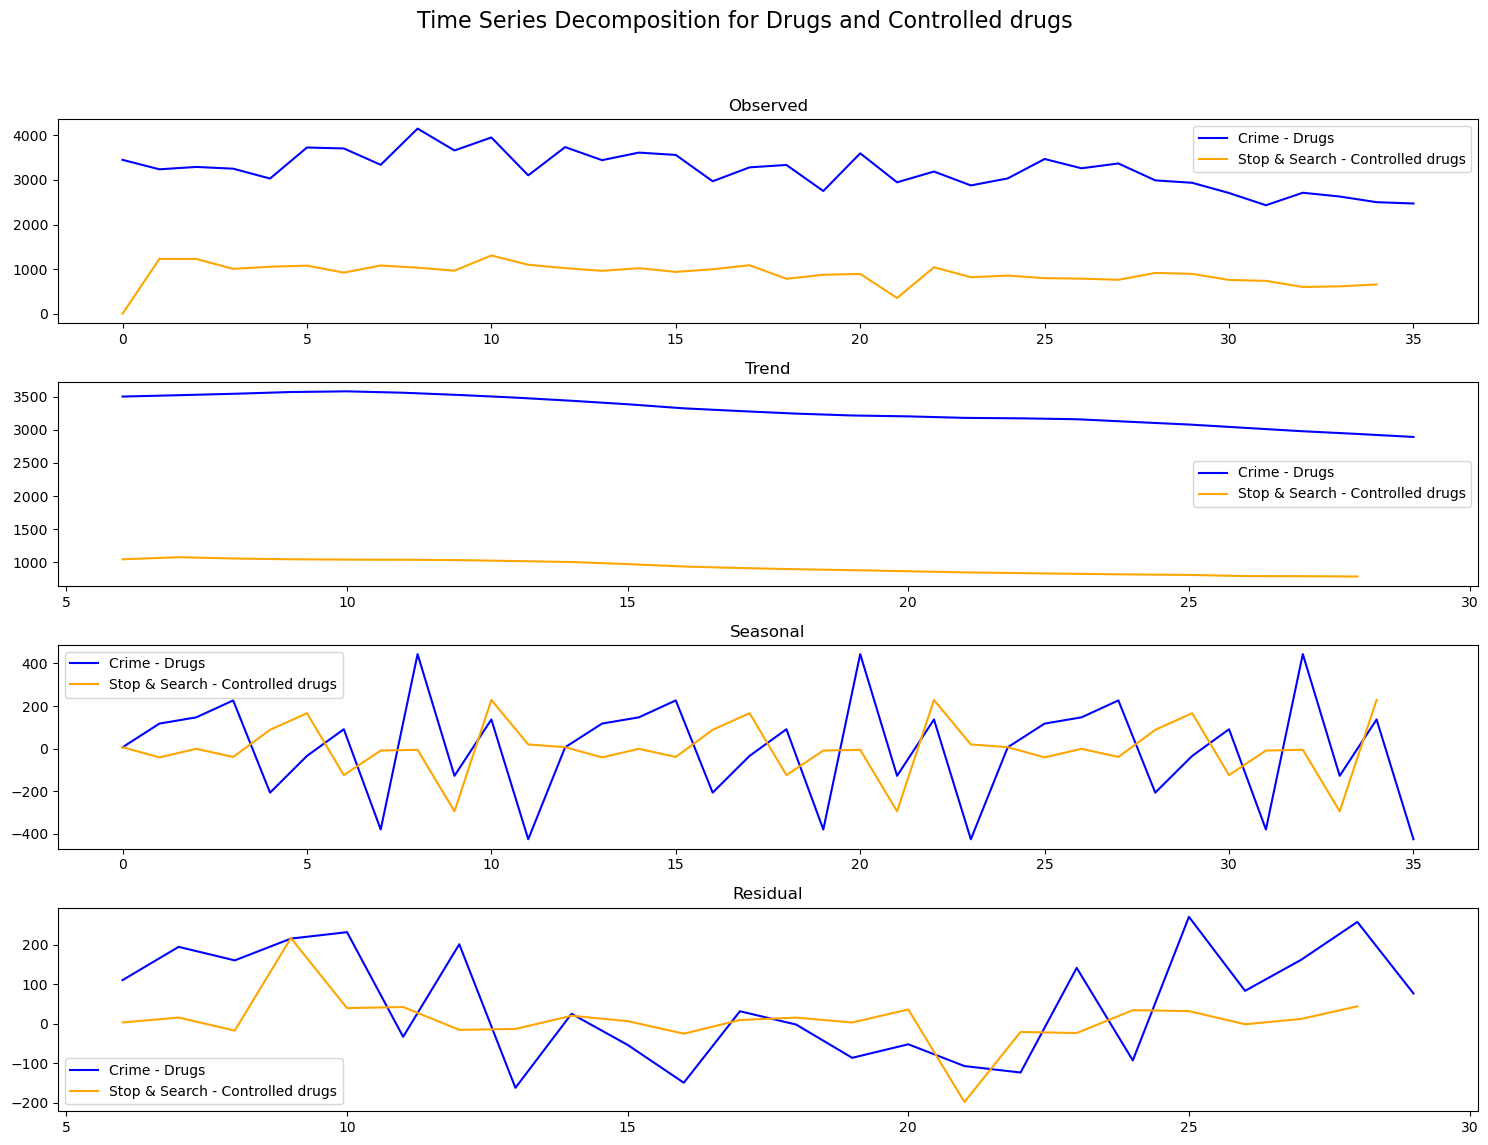

Correlation between Drugs and Controlled drugs:
Trend Correlation: 0.98 (positively correlated, statistically significant, p-value: 0.0000)
Seasonal Correlation: 0.04 (no correlation, not statistically significant, p-value: 0.8427)
Residual Correlation: 0.40 (no correlation, not statistically significant, p-value: 0.0554)



C:\Users\JUMIA-4237\AppData\Local\Temp\ipykernel_22804\3683387733.py:82: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  SH_series = SH.groupby(SH['Date'].dt.to_period('M'))[SH_cat].sum()


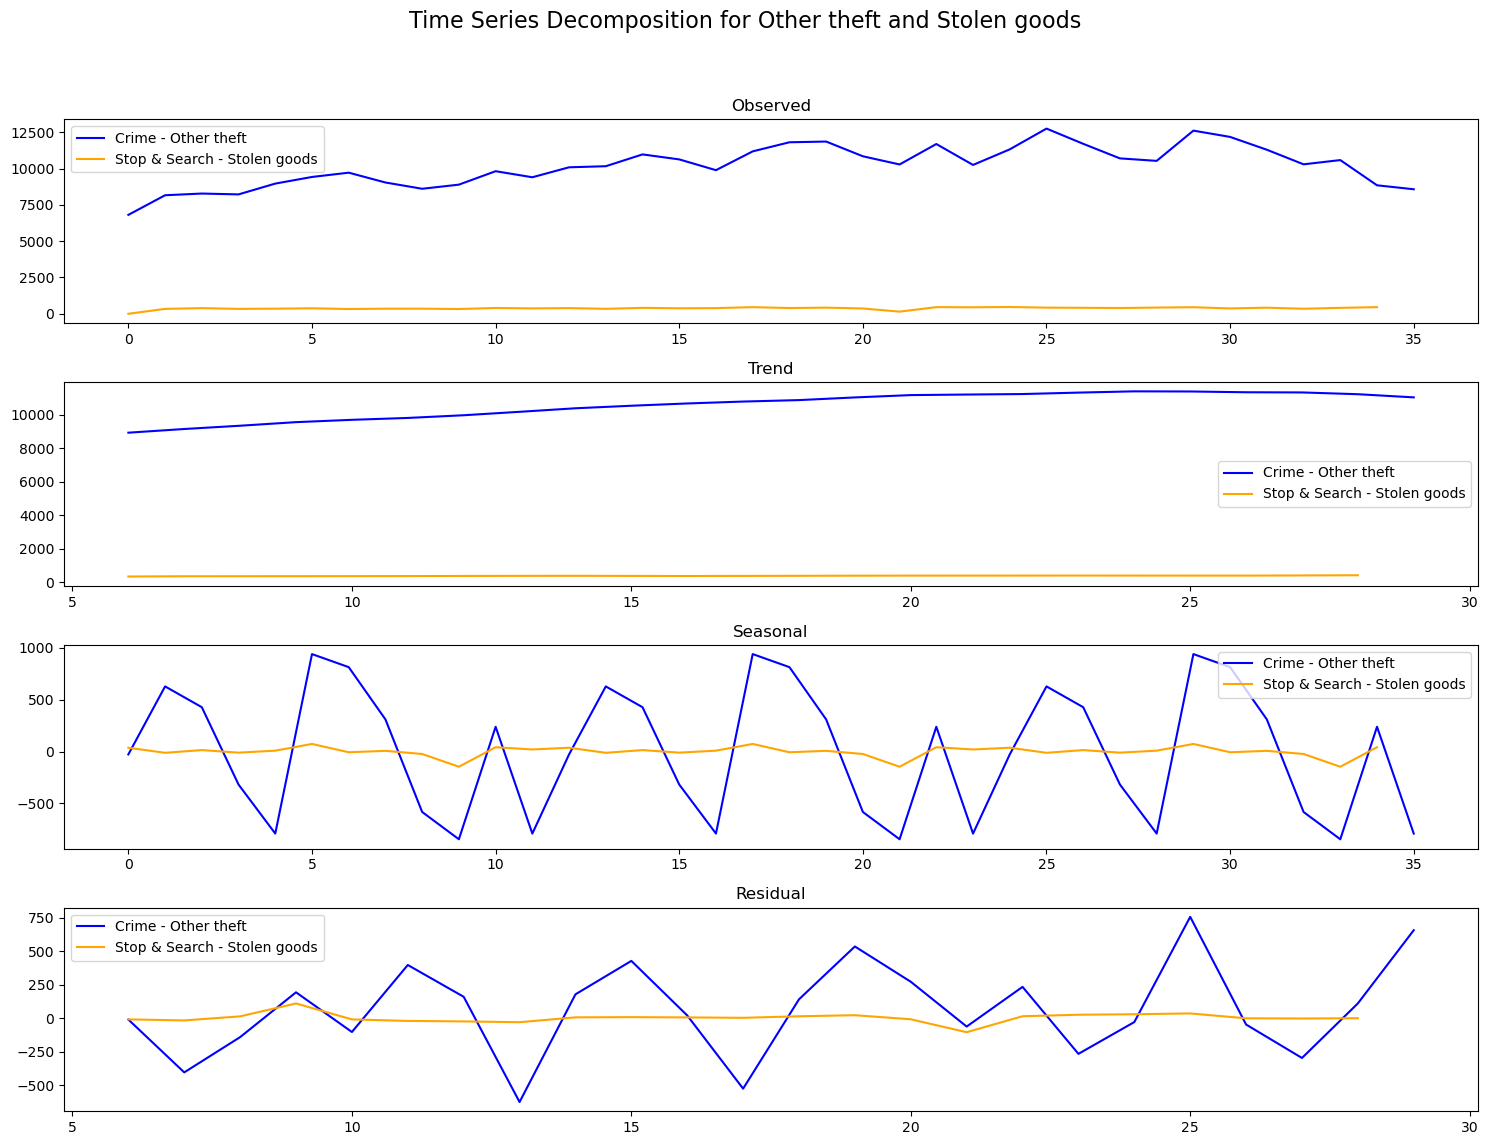

Correlation between Other theft and Stolen goods:
Trend Correlation: 0.93 (positively correlated, statistically significant, p-value: 0.0000)
Seasonal Correlation: 0.45 (positively correlated, statistically significant, p-value: 0.0329)
Residual Correlation: 0.28 (no correlation, not statistically significant, p-value: 0.1888)



C:\Users\JUMIA-4237\AppData\Local\Temp\ipykernel_22804\3683387733.py:82: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  SH_series = SH.groupby(SH['Date'].dt.to_period('M'))[SH_cat].sum()


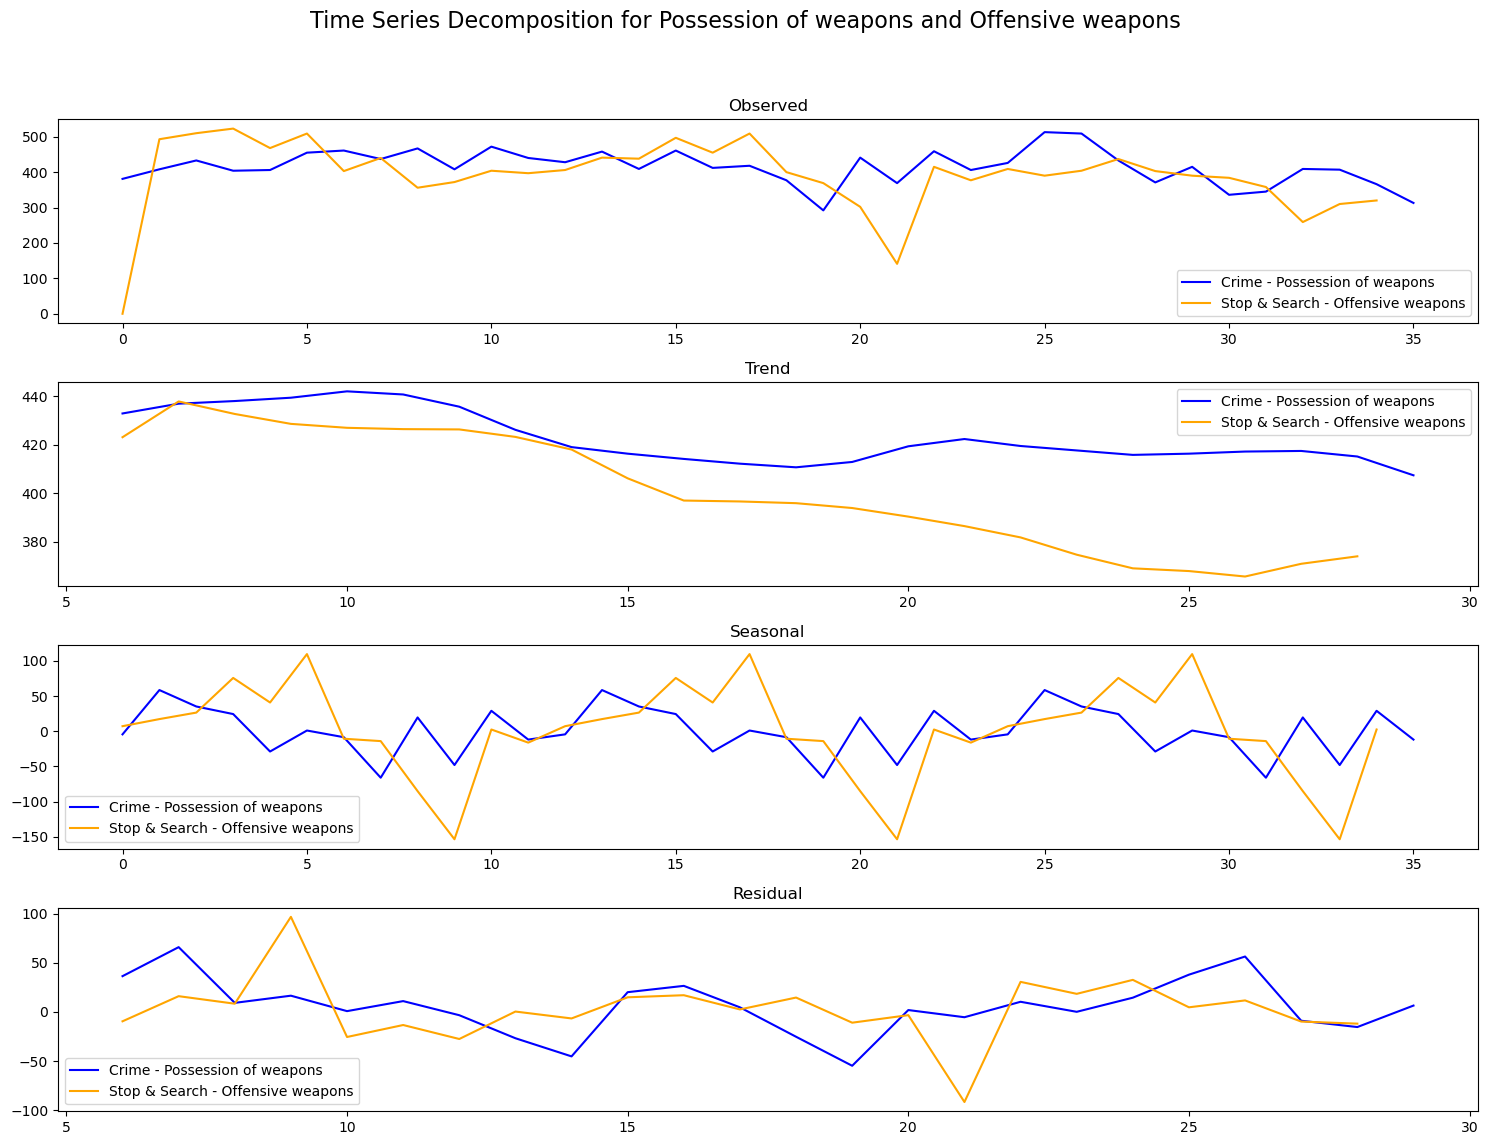

Correlation between Possession of weapons and Offensive weapons:
Trend Correlation: 0.79 (positively correlated, statistically significant, p-value: 0.0000)
Seasonal Correlation: 0.38 (no correlation, not statistically significant, p-value: 0.0754)
Residual Correlation: 0.27 (no correlation, not statistically significant, p-value: 0.2051)



C:\Users\JUMIA-4237\AppData\Local\Temp\ipykernel_22804\3683387733.py:82: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  SH_series = SH.groupby(SH['Date'].dt.to_period('M'))[SH_cat].sum()


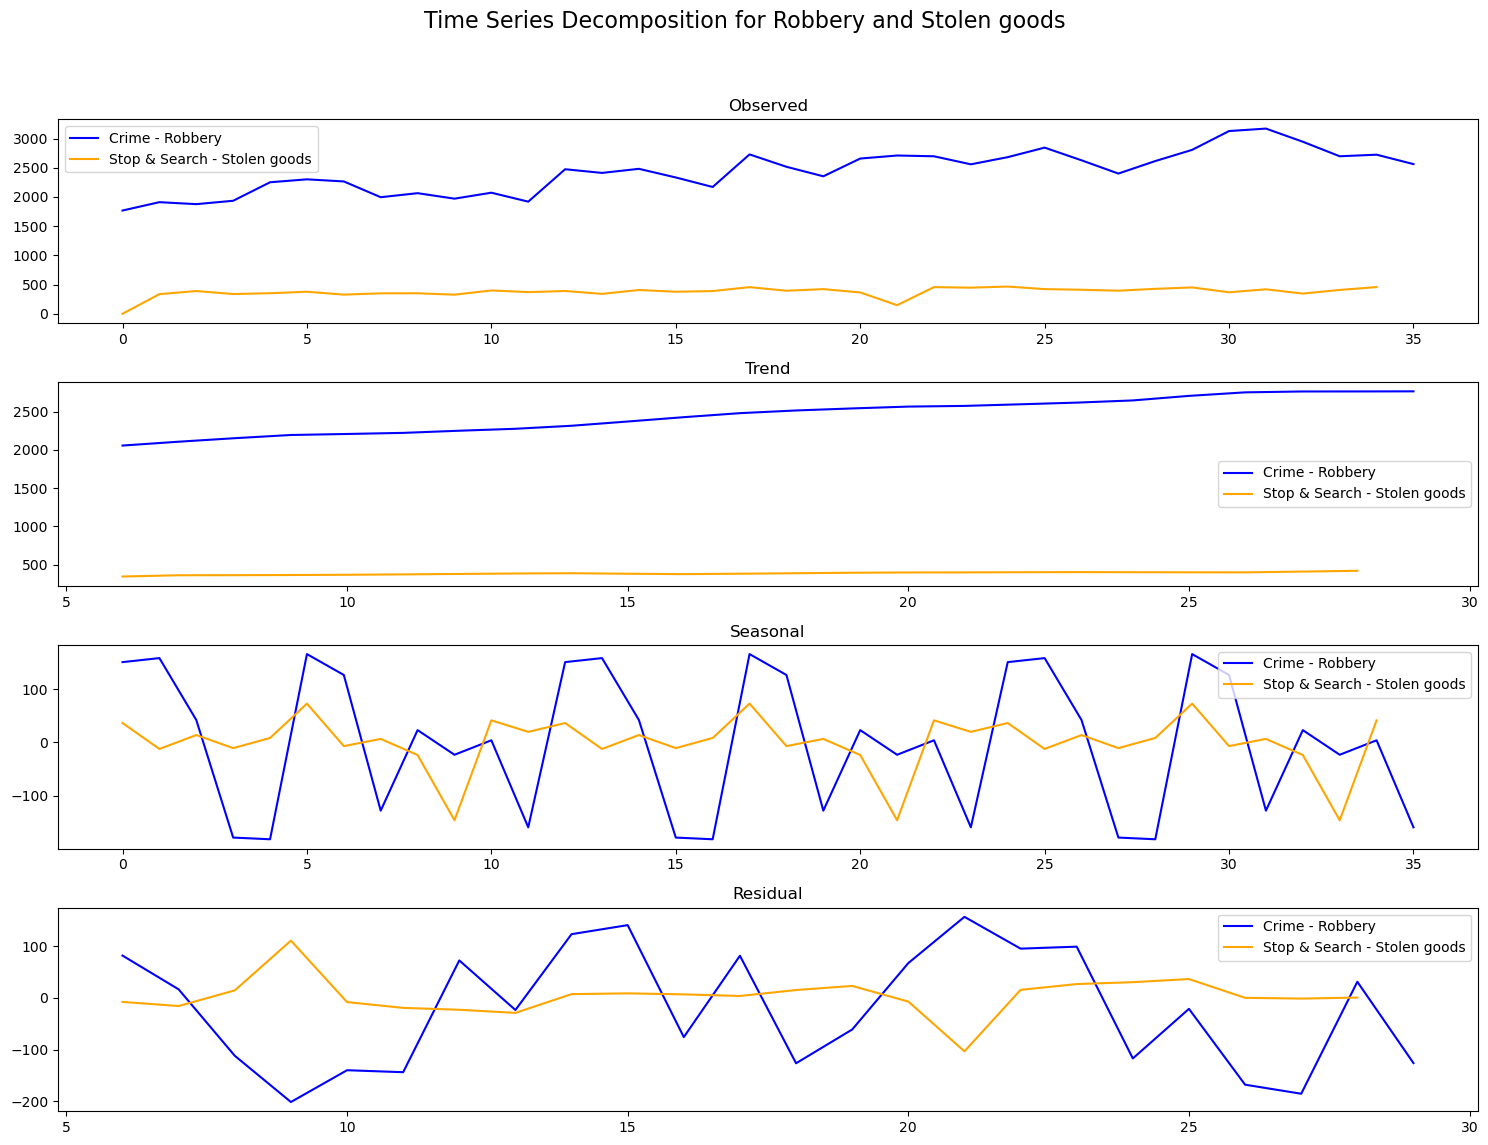

Correlation between Robbery and Stolen goods:
Trend Correlation: 0.94 (positively correlated, statistically significant, p-value: 0.0000)
Seasonal Correlation: 0.12 (no correlation, not statistically significant, p-value: 0.5997)
Residual Correlation: -0.42 (negatively correlated, statistically significant, p-value: 0.0478)



C:\Users\JUMIA-4237\AppData\Local\Temp\ipykernel_22804\3683387733.py:82: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  SH_series = SH.groupby(SH['Date'].dt.to_period('M'))[SH_cat].sum()


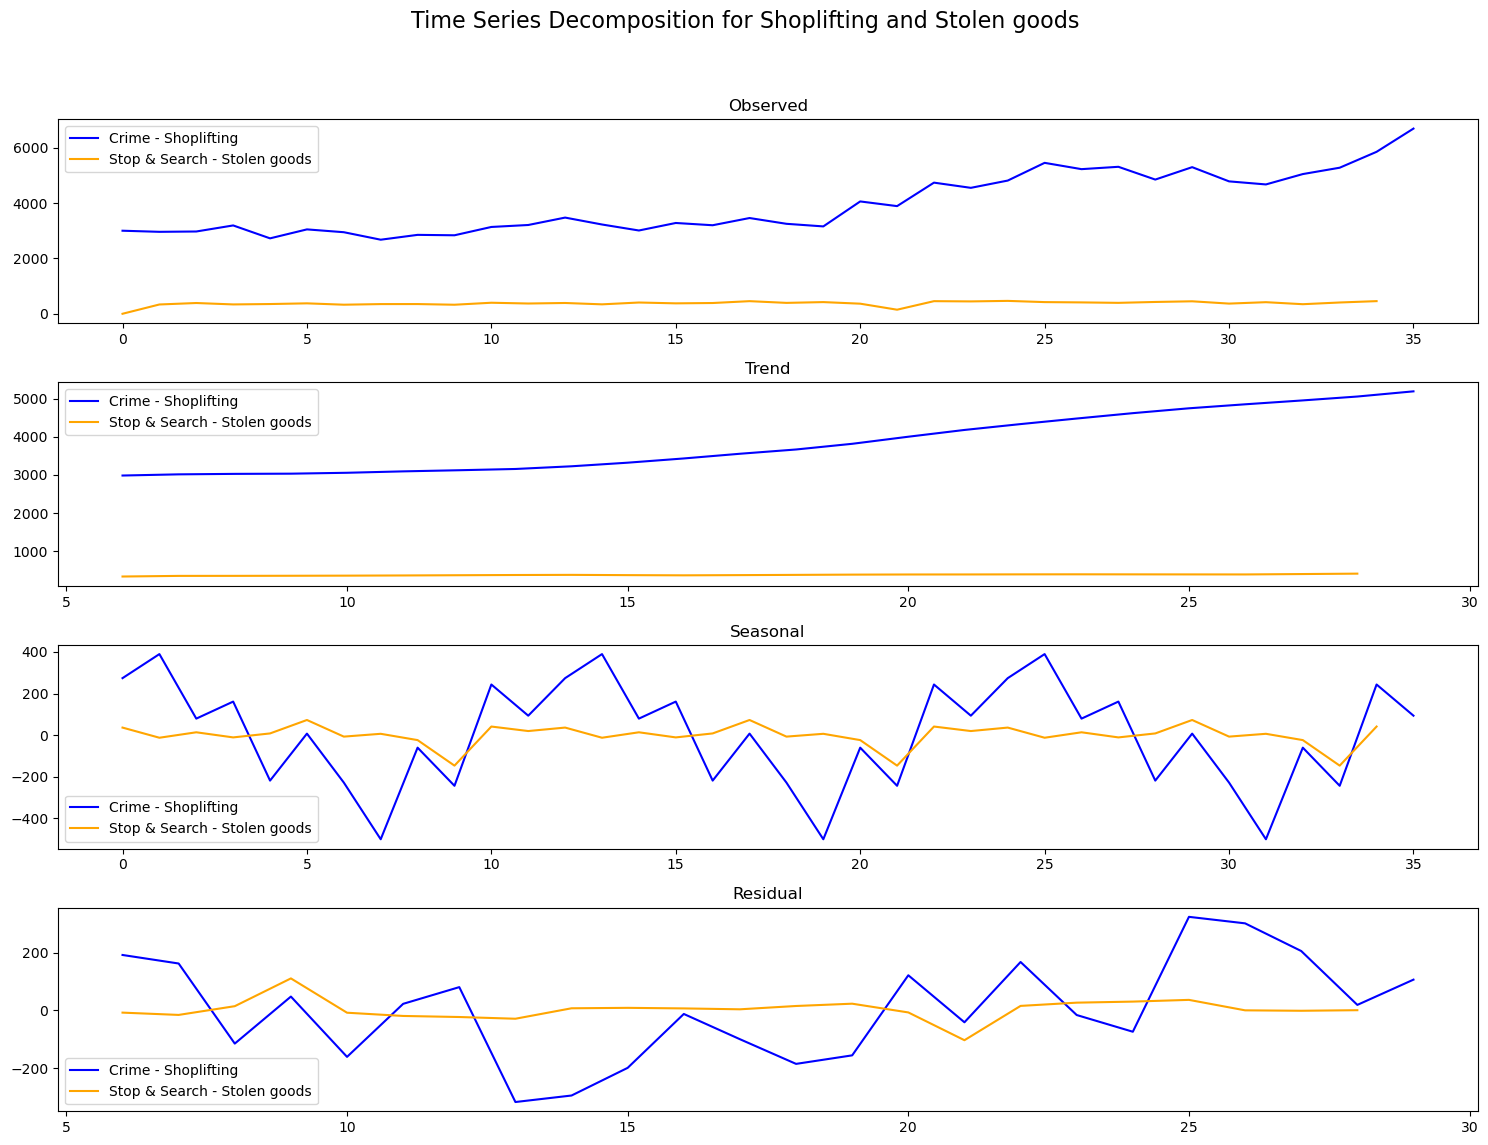

Correlation between Shoplifting and Stolen goods:
Trend Correlation: 0.89 (positively correlated, statistically significant, p-value: 0.0000)
Seasonal Correlation: 0.35 (no correlation, not statistically significant, p-value: 0.1063)
Residual Correlation: 0.08 (no correlation, not statistically significant, p-value: 0.7026)



C:\Users\JUMIA-4237\AppData\Local\Temp\ipykernel_22804\3683387733.py:82: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  SH_series = SH.groupby(SH['Date'].dt.to_period('M'))[SH_cat].sum()


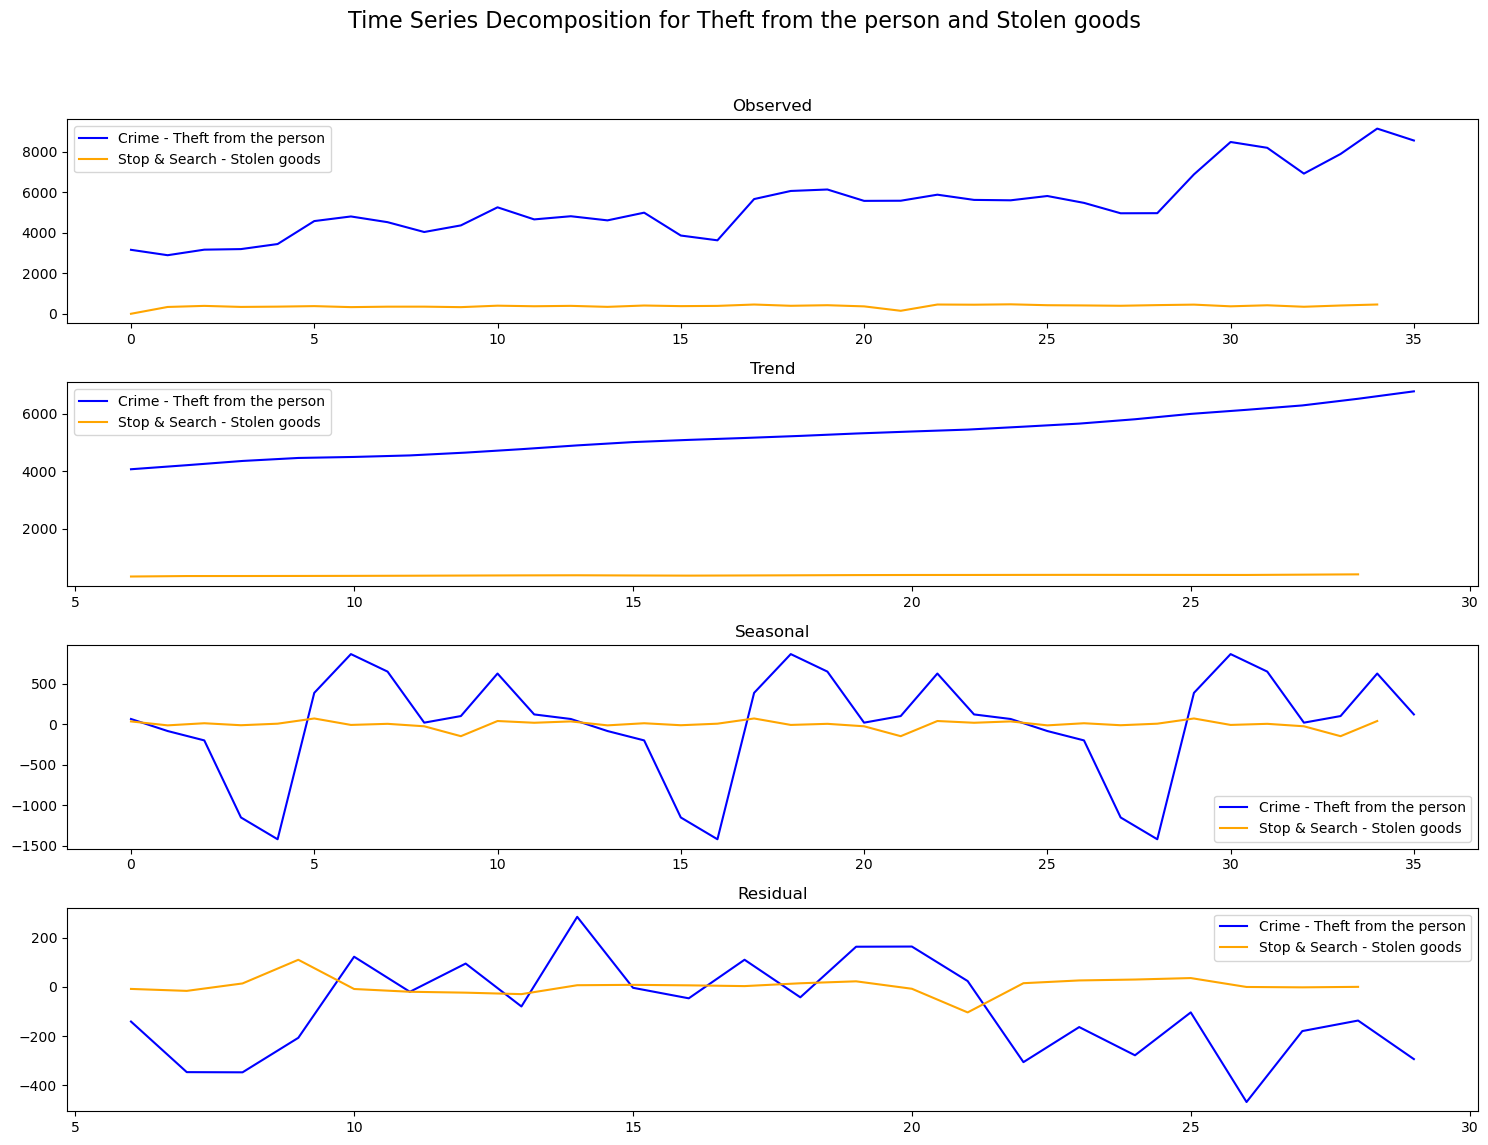

Correlation between Theft from the person and Stolen goods:
Trend Correlation: 0.94 (positively correlated, statistically significant, p-value: 0.0000)
Seasonal Correlation: 0.07 (no correlation, not statistically significant, p-value: 0.7571)
Residual Correlation: -0.22 (no correlation, not statistically significant, p-value: 0.3029)



C:\Users\JUMIA-4237\AppData\Local\Temp\ipykernel_22804\3683387733.py:82: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  SH_series = SH.groupby(SH['Date'].dt.to_period('M'))[SH_cat].sum()


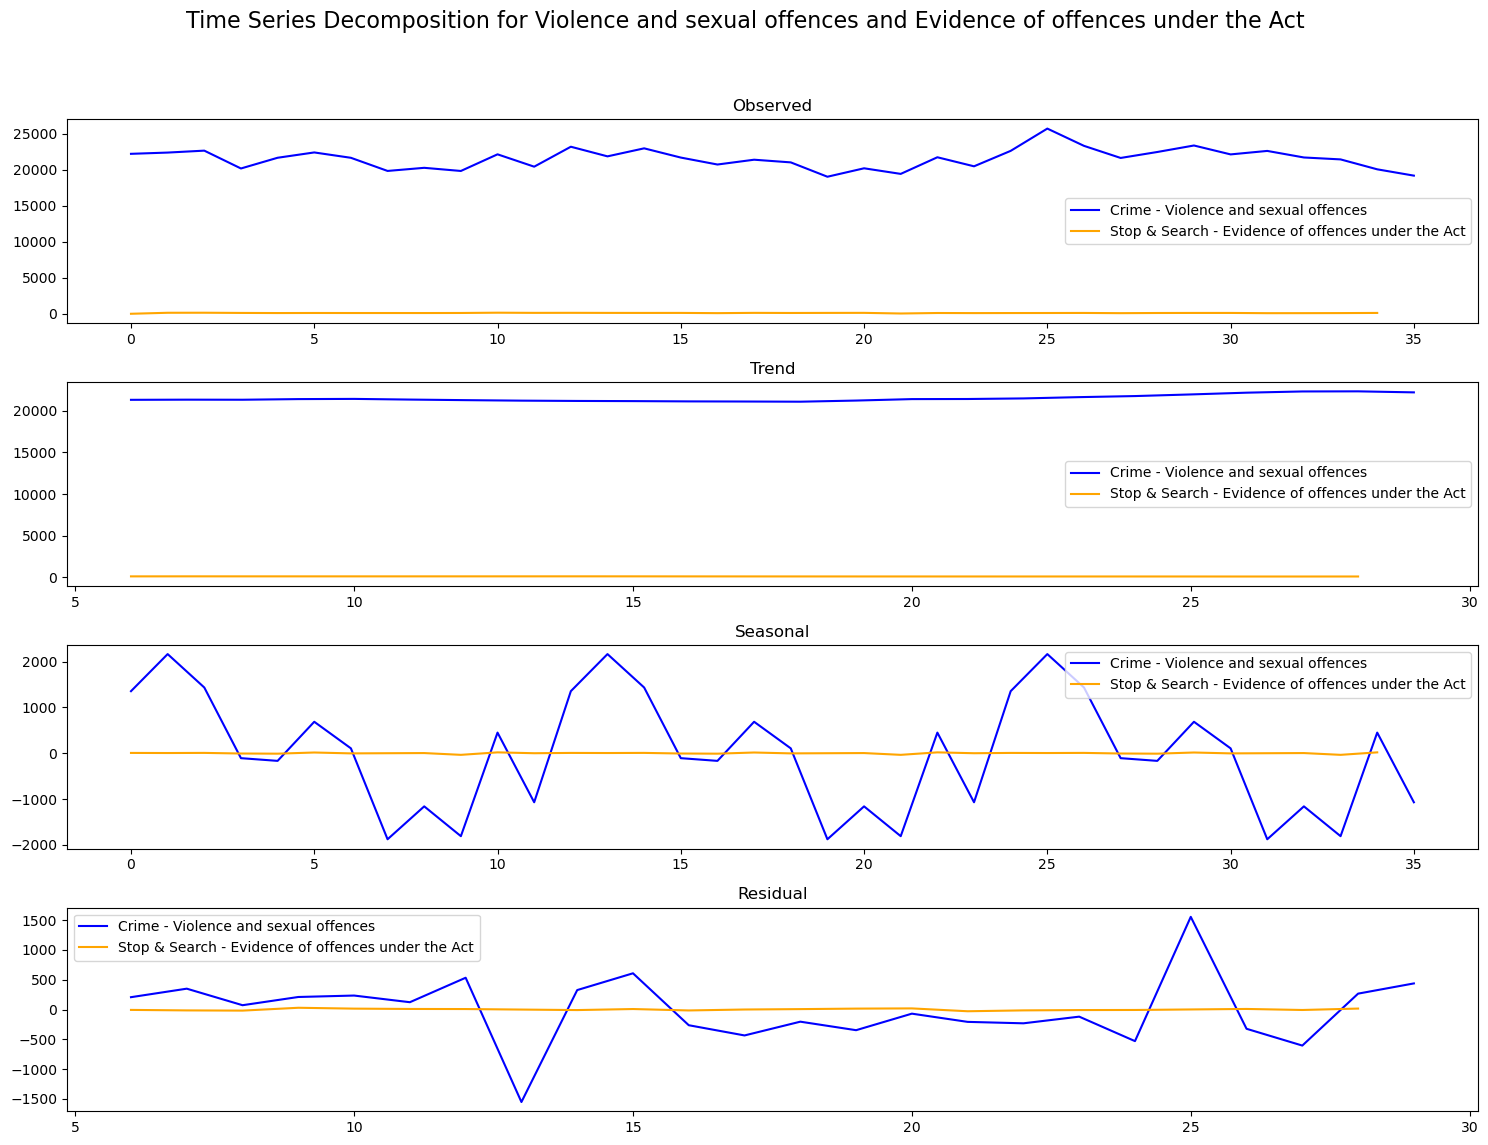

Correlation between Violence and sexual offences and Evidence of offences under the Act:
Trend Correlation: -0.71 (negatively correlated, statistically significant, p-value: 0.0002)
Seasonal Correlation: 0.54 (positively correlated, statistically significant, p-value: 0.0073)
Residual Correlation: 0.16 (no correlation, not statistically significant, p-value: 0.4695)



In [102]:
from statsmodels.tsa.seasonal import seasonal_decompose
from scipy.stats import pearsonr

def overlay_decomposition(crime_data, SH_data, crime_cat, SH_cat):
    crime_decomposition = seasonal_decompose(crime_data[crime_cat], model='additive', period=12)
    SH_decomposition = seasonal_decompose(SH_data[SH_cat], model='additive', period=12)

    fig, axs = plt.subplots(4, 1, figsize=(15, 12))
    fig.suptitle(f'Time Series Decomposition for {crime_cat} and {SH_cat}', fontsize=16)

    axs[0].plot(crime_decomposition.observed, label=f'Crime - {crime_cat}', color='blue')
    axs[0].plot(SH_decomposition.observed, label=f'Stop & Search - {SH_cat}', color='orange')
    axs[0].set_title('Observed')
    axs[0].legend()

    axs[1].plot(crime_decomposition.trend, label=f'Crime - {crime_cat}', color='blue')
    axs[1].plot(SH_decomposition.trend, label=f'Stop & Search - {SH_cat}', color='orange')
    axs[1].set_title('Trend')
    axs[1].legend()

    axs[2].plot(crime_decomposition.seasonal, label=f'Crime - {crime_cat}', color='blue')
    axs[2].plot(SH_decomposition.seasonal, label=f'Stop & Search - {SH_cat}', color='orange')
    axs[2].set_title('Seasonal')
    axs[2].legend()

    axs[3].plot(crime_decomposition.resid, label=f'Crime - {crime_cat}', color='blue')
    axs[3].plot(SH_decomposition.resid, label=f'Stop & Search - {SH_cat}', color='orange')
    axs[3].set_title('Residual')
    axs[3].legend()

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

def calculate_correlation(crime_data, SH_data, crime_cat, SH_cat):
    crime_decomposition = seasonal_decompose(crime_data[crime_cat], model='additive', period=12)
    SH_decomposition = seasonal_decompose(SH_data[SH_cat], model='additive', period=12)

    common_index = crime_decomposition.trend.dropna().index.intersection(SH_decomposition.trend.dropna().index)
    
    def interpret_correlation(corr, p_value, component_name):
        interpretation = "no correlation"
        significance = "not statistically significant"

        if p_value < 0.05:
            significance = "statistically significant"
            if corr > 0:
                interpretation = "positively correlated"
            elif corr < 0:
                interpretation = "negatively correlated"

        return f'{component_name} Correlation: {corr:.2f} ({interpretation}, {significance}, p-value: {p_value:.4f})'

    trend_corr, trend_p_value = pearsonr(crime_decomposition.trend.dropna().loc[common_index], SH_decomposition.trend.dropna().loc[common_index])
    seasonal_corr, seasonal_p_value = pearsonr(crime_decomposition.seasonal.dropna().loc[common_index], SH_decomposition.seasonal.dropna().loc[common_index])
    resid_corr, resid_p_value = pearsonr(crime_decomposition.resid.dropna().loc[common_index], SH_decomposition.resid.dropna().loc[common_index])

    trend_result = interpret_correlation(trend_corr, trend_p_value, "Trend")
    seasonal_result = interpret_correlation(seasonal_corr, seasonal_p_value, "Seasonal")
    resid_result = interpret_correlation(resid_corr, resid_p_value, "Residual")

    print(f'Correlation between {crime_cat} and {SH_cat}:')
    print(trend_result)
    print(seasonal_result)
    print(resid_result)
    print()

for crime_cat, SH_cat in matched_categories:
    crime_series = combined_df.groupby('Month')[crime_cat].sum()
    SH_series = SH.groupby(SH['Date'].dt.to_period('M'))[SH_cat].sum()

    crime_series = crime_series.to_frame().reset_index()
    crime_series['Month'] = pd.to_datetime(crime_series['Month'].astype(str))

    SH_series = SH_series.to_frame().reset_index()
    SH_series['Date'] = pd.to_datetime(SH_series['Date'].astype(str))

    overlay_decomposition(crime_series, SH_series, crime_cat, SH_cat)

    calculate_correlation(crime_series, SH_series, crime_cat, SH_cat)
